In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_csv("ttrain.csv")
df_test= pd.read_csv("ttest.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df= pd.concat([df_train,df_test],join="outer", ignore_index=True)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df["Ticket"].nunique()

929

In [10]:
df= df.drop(["Ticket","Cabin"], axis=1)

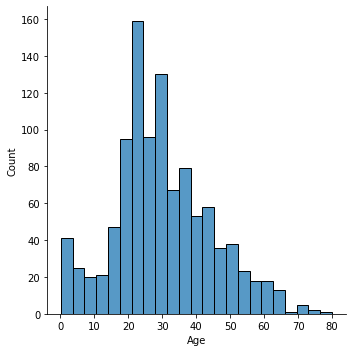

In [11]:
import seaborn as sns

sns.displot(df["Age"])

<AxesSubplot:>

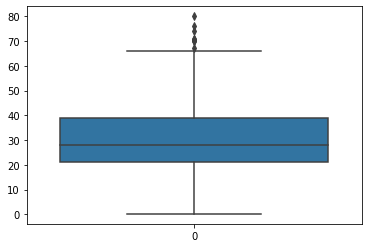

In [12]:
sns.boxplot(data=df["Age"])

In [13]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,8.0500,S


In [15]:
df_dummied= df.drop(["Name", "PassengerId"], axis=1)

In [16]:
df_dummied= pd.get_dummies(data=df_dummied)

In [17]:
df_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1.0,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1.0,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1.0,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,29.881138,0,0,8.0500,0,1,0,0,1
1305,NaN,1,39.000000,0,0,108.9000,1,0,1,0,0
1306,NaN,3,38.500000,0,0,7.2500,0,1,0,0,1
1307,NaN,3,29.881138,0,0,8.0500,0,1,0,0,1


In [18]:
df_test= df_dummied[df_dummied["Survived"].isnull()==True]
df_train= df_dummied[df_dummied["Survived"].isnull()==False]
df_test.reset_index
df_train.reset_index

<bound method DataFrame.reset_index of      Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0.0       3  22.000000      1      0   7.2500           0         1   
1         1.0       1  38.000000      1      0  71.2833           1         0   
2         1.0       3  26.000000      0      0   7.9250           1         0   
3         1.0       1  35.000000      1      0  53.1000           1         0   
4         0.0       3  35.000000      0      0   8.0500           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886       0.0       2  27.000000      0      0  13.0000           0         1   
887       1.0       1  19.000000      0      0  30.0000           1         0   
888       0.0       3  29.881138      1      2  23.4500           1         0   
889       1.0       1  26.000000      0      0  30.0000           0         1   
890       0.0       3  32.000000      0      0   7.7500           0   

In [19]:
y_train, X_train= df_train["Survived"], df_train.drop(["Survived"], axis=1)
y_test, X_test= df_test["Survived"], df_test.drop(["Survived"], axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaler = ss.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

In [22]:
model = Sequential([

    Dense(128,input_dim = X_train.shape[1], activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),    
    Dense(1, activation="sigmoid")])

# Compile the network :
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                        

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, verbose=1)

Epoch 1/500
23/23 [==============================] - 2s 15ms/step - loss: 0.1972 - accuracy: 0.7374 - val_loss: 0.1995 - val_accuracy: 0.8492
Epoch 2/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1520 - accuracy: 0.7978 - val_loss: 0.1682 - val_accuracy: 0.8324
Epoch 3/500
23/23 [==============================] - 0s 9ms/step - loss: 0.1398 - accuracy: 0.8216 - val_loss: 0.1533 - val_accuracy: 0.8101
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1489 - accuracy: 0.7963 - val_loss: 0.1402 - val_accuracy: 0.8212
Epoch 5/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1384 - accuracy: 0.8202 - val_loss: 0.1353 - val_accuracy: 0.8156
Epoch 6/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1405 - accuracy: 0.8090 - val_loss: 0.1274 - val_accuracy: 0.8324
Epoch 7/500
23/23 [==============================] - 0s 9ms/step - loss: 0.1399 - accuracy: 0.8006 - val_loss: 0.1203 - val_accuracy: 0.8324
Epoch 8/500


Epoch 59/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1200 - accuracy: 0.8455 - val_loss: 0.0995 - val_accuracy: 0.8827
Epoch 60/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1165 - accuracy: 0.8427 - val_loss: 0.1031 - val_accuracy: 0.8603
Epoch 61/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1209 - accuracy: 0.8357 - val_loss: 0.1010 - val_accuracy: 0.8715
Epoch 62/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1221 - accuracy: 0.8483 - val_loss: 0.1003 - val_accuracy: 0.8603
Epoch 63/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1126 - accuracy: 0.8610 - val_loss: 0.1006 - val_accuracy: 0.8659
Epoch 64/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.8441 - val_loss: 0.1019 - val_accuracy: 0.8603
Epoch 65/500
23/23 [==============================] - ETA: 0s - loss: 0.1162 - accuracy: 0.8469

In [ ]:
scores = model.evaluate(X_train, y_train)